In [1]:
import pandas as pd

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/SharedTask/combined_augmented_dataset_with_dev.csv')  # Replace with the correct path to your dataset

In [3]:
# Convert string representation of lists to actual lists
import ast

# Apply replacement for empty lists
df['techniques'] = df['techniques'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df['techniques'] = df['techniques'].apply(lambda x: ['no_technique'] if not x else x)
df['techniques'] = df['techniques'].apply(lambda x: str(x) if isinstance(x, list) else x)

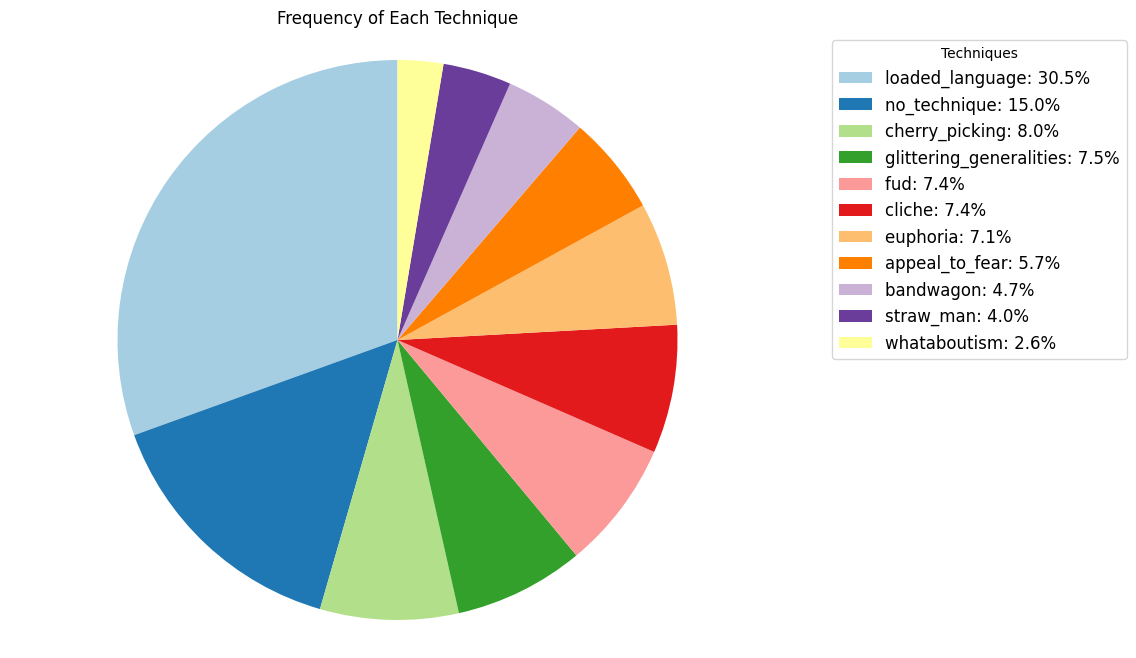

In [4]:
# List of techniques to count
techniques_to_count = [
    'loaded_language', 'cherry_picking', 'glittering_generalities',
    'cliche', 'euphoria', 'fud', 'appeal_to_fear', 'whataboutism',
    'bandwagon', 'straw_man','no_technique'
]

# Function to split and count techniques
def count_individual_techniques(series):
    all_techniques = series.str.strip('[]').str.replace("'", "").str.split(', ')
    return Counter(technique for sublist in all_techniques for technique in sublist if technique)

# Get the counts
individual_counts = count_individual_techniques(df['techniques'])

# Get the counts for each technique in the list
technique_counts = [individual_counts.get(technique, 0) for technique in techniques_to_count]

# Get the total count for all techniques
total_count = sum(technique_counts)

# Get the percentage for each technique
technique_percentages = [count / total_count * 100 for count in technique_counts]

# Sort the techniques by count in descending order
sorted_techniques = sorted(zip(techniques_to_count, technique_counts, technique_percentages), key=lambda x: x[1], reverse=True)
sorted_techniques, sorted_counts, sorted_percentages = zip(*sorted_techniques)

# Create the pie chart with only percentages inside
plt.figure(figsize=(10, 8))  # Adjusting pie chart size
plt.pie(sorted_counts, labels=None, startangle=90, colors=plt.cm.Paired.colors, pctdistance=0.85)

# Add title and adjust the chart
plt.title('Frequency of Each Technique')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.

# Add legend with the technique names and percentages
legend_labels = [f'{technique}: {percent:.1f}%' for technique, percent in zip(sorted_techniques, sorted_percentages)]
plt.legend(legend_labels, title="Techniques", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

# Display the chart
plt.show()
